EM Waves
=====
Here we will write some code to help visualize electromagnetic waves.  We will start with a EM plane wave.  The code template below is mostly ready to go.  You will need to add some code to calcualte the electric field.

The first code block below loads various modules and functions into our session.  You shouldn't need to change anything here.

In [1]:
%matplotlib notebook
from matplotlib import pyplot
from math import *
from numpy import arange,array,zeros,meshgrid
from mpl_toolkits.mplot3d import Axes3D



Now the fun starts.  We need to calculate the electric field.  For simplicity, we aren't going to worry about the field in the z-direction since it doesn't have any z dependance.  I've already established a grid (x,y,t) on which we will solve for the E field.  

A blank array to store the E field has already been created:
`eField = zeros((len(x),len(y),len(t)))`.  This is a 3D matrix that stores information about the eField everywhere on our space and time grid.  At first, it is simply a huge array of zeros.  The zeros will need to be replaced.

In order to fill in our E matrix, I've opted to use 3 loops: 1 for each dimension.  This will allow me to fill the matrix one element at a time.  There are other ways to do this, and you may explore them if you would like, but you don't have to.

Your job is to add code to the `thisE.append(...)` line so that you are calculating the value of the electric field at each grid point (a specific point is indexed using the variables `thisx, thisy,` and `thist`.  Once you do that and run the code block, you should see a plot of the electric field strength as a function of y.




<IPython.core.display.Javascript object>


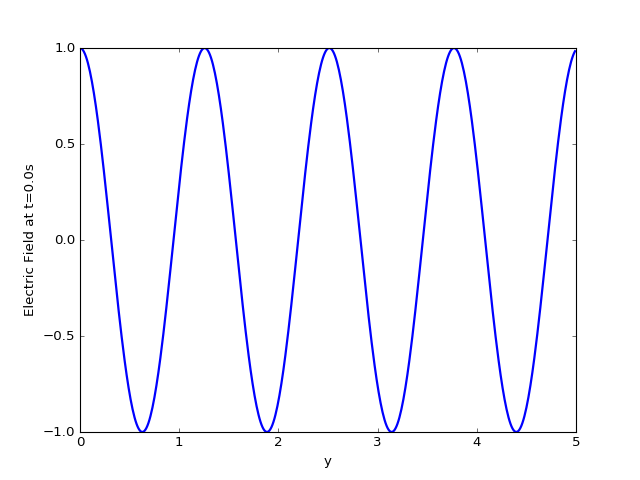

In [3]:
E0 = 1
k = 5 # units = 1/mm
omega = 1
delta = 0
x = arange(0,5,.1)
y = arange(0,5,.01) #units = mm
t = arange(0,5,.1)

eField = zeros((len(x),len(y),len(t)))
it = 0
for thist in t:
    iy = 0
    for thisy in y:
        thisE = []
        for thisx in x:
            thisE.append(E0*cos(k*thisy-omega*thist+delta))
    
        eField[:,iy,it] = thisE
        iy += 1
    it += 1
    
pyplot.figure()    
pyplot.plot(y,eField[0,:,0],'b',lw=2)
pyplot.xlabel('y')
pyplot.ylabel('Electric Field at t={}s'.format(t[0]))
pyplot.show()


<IPython.core.display.Javascript object>


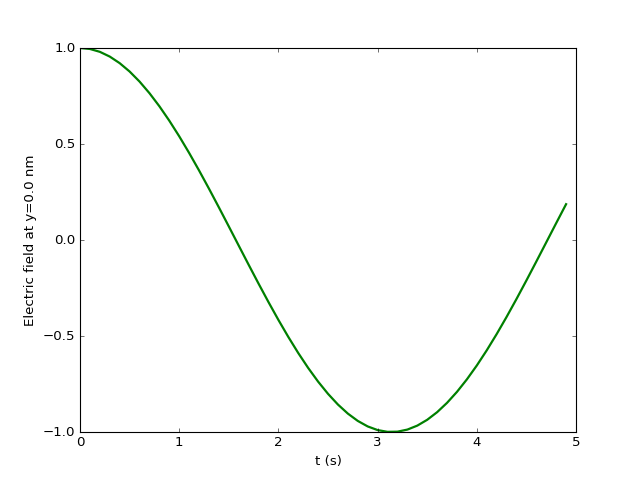

In [4]:
pyplot.figure()
pyplot.plot(t,eField[0,0,:],'g',lw=2)
pyplot.xlabel('t (s)')
pyplot.ylabel('Electric field at y={} nm'.format(y[0]))
pyplot.show()

<IPython.core.display.Javascript object>


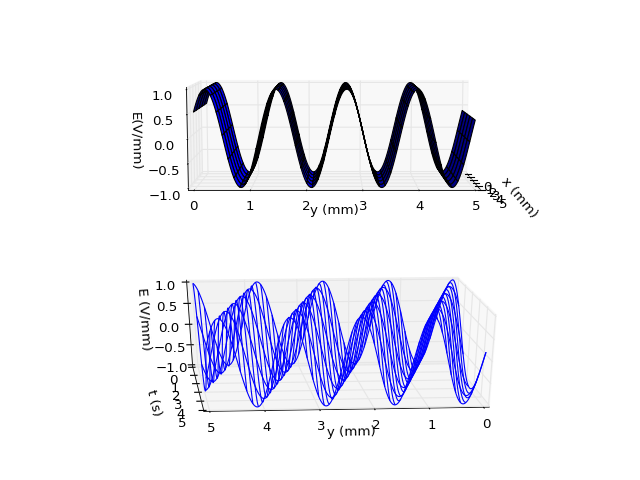

In [5]:
fig = pyplot.figure()
ax = fig.add_subplot(211, projection='3d')
Y,X = meshgrid(y,x)
ax.plot_surface(X,Y,eField[:,:,10])
ax.view_init(elev=7,azim=0)
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_zlabel('E(V/mm)')

ax = fig.add_subplot(212, projection='3d')
T,Y = meshgrid(t,y)
ax.plot_wireframe(Y,T,eField[0,:,:],rstride=10,cstride=10)
ax.view_init(elev=25,azim=85)
ax.set_xlabel('y (mm)')
ax.set_ylabel('t (s)')
ax.set_zlabel('E (V/mm)')
pyplot.show()